In [1]:
import os
os.environ["JAX_PLATFORM_NAME"] = "gpu"                 # comment out if CPU
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"
from jax import config
config.update("jax_enable_x64", True)
import jax
print(jax.default_backend(), jax.devices()) 
from pfcheeshmc import PfCheesHMC

gpu [CudaDevice(id=0)]


# 8 Schools Example
Based on the famous 8 schools example demonstrating hierarchical models.

In [2]:
import numpy as np
import pymc as pm
import arviz as az

In [9]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

with pm.Model() as model:
    mu = pm.Normal("mu", mu=0.0, sigma=10.0)
    tau = pm.HalfCauchy("tau", 5.0)

    theta = pm.Normal("theta", mu=0, sigma=1, shape=J)
    theta_1 = mu + tau * theta
    obs = pm.Normal("obs", mu=theta_1, sigma=sigma, shape=J, observed=y)
    idata = pm.sample_prior_predictive(1000)

Sampling: [mu, obs, tau, theta]


In [10]:
pchees_sampler = PfCheesHMC(model)
posterior_idata = pchees_sampler.sample()
idata.extend(posterior_idata)

ε Tuning:   0%|          | 0/32 [00:00<?, ?it/s]

ChEES Adaptation:   0%|          | 0/2000 [00:00<?, ?it/s]

Sampling Dynamic HMC::   0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
with model:
    post_idata = pm.sample_posterior_predictive(idata, var_names=["obs"])
    idata.extend(post_idata)

Sampling: [obs, tau]


Output()

array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'tau_log__'}>,
        <Axes: title={'center': 'tau_log__'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

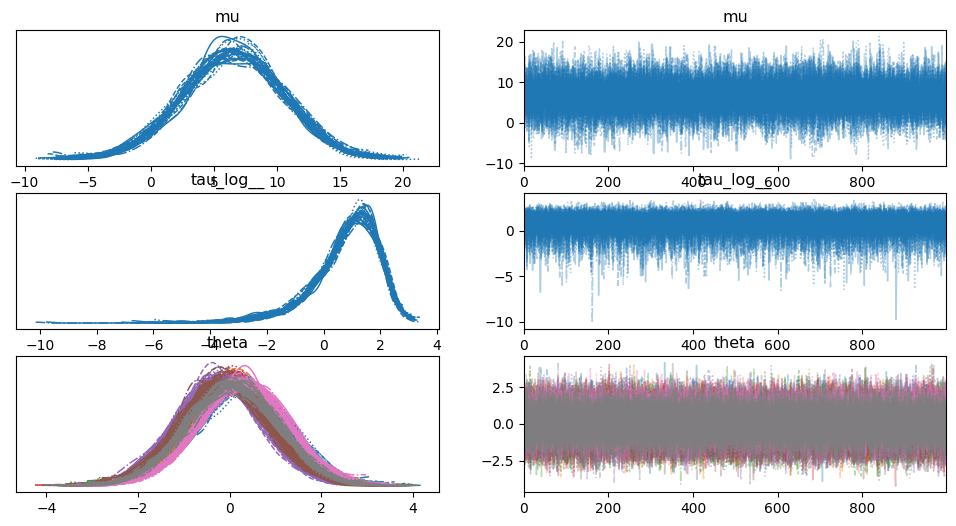

In [14]:
az.plot_trace(posterior_idata)

In [15]:
az.summary(posterior_idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,6.511,4.036,-1.131,14.053,0.030,0.027,17861.0,16994.0,1.0
tau_log__,0.783,1.180,-1.464,2.658,0.009,0.010,18601.0,20111.0,1.0
theta[0],0.284,0.989,-1.573,2.144,0.006,0.005,28649.0,24898.0,1.0
theta[1],0.038,0.941,-1.798,1.755,0.005,0.005,29364.0,24074.0,1.0
theta[2],-0.118,0.977,-1.901,1.763,0.006,0.005,31447.0,25408.0,1.0
theta[3],0.009,0.951,-1.833,1.737,0.006,0.005,28071.0,24716.0,1.0
theta[4],-0.222,0.944,-2.053,1.522,0.006,0.005,24885.0,22728.0,1.0
theta[5],-0.125,0.956,-1.991,1.634,0.006,0.005,26672.0,23353.0,1.0
theta[6],0.295,0.962,-1.503,2.123,0.006,0.005,28485.0,25409.0,1.0
theta[7],0.057,0.979,-1.782,1.892,0.006,0.005,27961.0,23820.0,1.0
